In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import array_to_latex as ltx

In [16]:
def covariance(x,y):
    c=np.inner(y,x)/len(x)-(sum(x)/len(x))*(sum(y)/len(y))
    return c
def rate_error(x,y,k):
    c = ((len(y)-2)**-0.5)*((covariance(y,y)/covariance(x,x)-k**2)**0.5)
    return c

In [17]:
data_array = pd.read_csv("data2csv.csv",  sep=";", decimal=",")
t1=data_array.iloc[:6,:].to_numpy()
t2=data_array.iloc[8:,:4].to_numpy()
#tabular1=np.transpose(t1)
#tabular2=np.transpose(t2)
data_array

,m,"\Delta y, 0.05 mm",P,\Delta y_{max},"m, при убывании",\Delta y,P.1,\Delta y_{max}.1,m.1,\Delta y.1,сумм М,\Delta y_{max}.2
0,482.5,1.15,4.736,1.15,478.2,-1.17,28.885,7.21,482.5,1.15,4.736,1.15
1,503.1,1.23,9.674,2.38,511,-1.24,24.191,6.04,503.1,1.22,9.674,2.37
2,501.3,1.28,14.595,3.66,466.7,-1.13,19.176,4.8,501.3,1.25,14.595,3.62
3,466.7,1.14,19.176,4.8,501.3,-1.23,14.595,3.67,466.7,1.13,19.176,4.75
4,511,1.25,24.191,6.05,503.1,-1.23,9.674,2.44,511,1.23,24.191,5.98
5,478.2,1.16,28.885,7.21,482.5,1.14,4.736,1.21,478.2,1.12,28.885,7.1
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"m,сталь","\Delta y, 0.05 mm",NaN,\Delta y_{max},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,482.5,0.65,4.736,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,503.1,0.7,9.674,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ltx.to_ltx(data_array.iloc[:6,:8])

\begin{tabular}{lrrrrrrrr}
\toprule
     & m & \Delta y, 0.05 mm & P & \Delta y_{max} & m, при убывании & \Delta y & P.1 & \Delta y_{max}.1 \\\n\midrule
 0 &  482.5 &  1.15 &  4.736  &  1.15 &  478.2 &  -1.17 &  28.885 &  7.21\\
 1 &  503.1 &  1.23 &  9.674  &  2.38 &  511   &  -1.24 &  24.191 &  6.04\\
 2 &  501.3 &  1.28 &  14.595 &  3.66 &  466.7 &  -1.13 &  19.176 &  4.8 \\
 3 &  466.7 &  1.14 &  19.176 &  4.8  &  501.3 &  -1.23 &  14.595 &  3.67\\
 4 &  511   &  1.25 &  24.191 &  6.05 &  503.1 &  -1.23 &  9.674  &  2.44\\
 5 &  478.2 &  1.16 &  28.885 &  7.21 &  482.5 &  1.14  &  4.736  &  1.21\\
\bottomrule
\end{tabular}


In [19]:
ltx.to_ltx(data_array.iloc[:6,8:])

\begin{tabular}{lrrrr}
\toprule
     & m.1 & \Delta y.1 & сумм М & \Delta y_{max}.2 \\\n\midrule
 0 &  482.5 &  1.15 &  4.736  &  1.15\\
 1 &  503.1 &  1.22 &  9.674  &  2.37\\
 2 &  501.3 &  1.25 &  14.595 &  3.62\\
 3 &  466.7 &  1.13 &  19.176 &  4.75\\
 4 &  511   &  1.23 &  24.191 &  5.98\\
 5 &  478.2 &  1.12 &  28.885 &  7.1 \\
\bottomrule
\end{tabular}


In [20]:
ltx.to_ltx(data_array.iloc[8:,:4])

\begin{tabular}{lrrrr}
\toprule
     & m & \Delta y, 0.05 mm & P & \Delta y_{max} \\\n\midrule
 8 &  482.5 &  0.65 &  4.736  &  0.65\\
 9 &  503.1 &  0.7  &  9.674  &  1.35\\
 10 &  501.3 &  0.67 &  14.595 &  2.02\\
 11 &  466.7 &  0.63 &  19.176 &  2.65\\
 12 &  511   &  0.7  &  24.191 &  3.35\\
 13 &  478.2 &  0.65 &  28.885 &  4   \\
\bottomrule
\end{tabular}


In [21]:
t2

array([['482.5', '0.65', '4.736', '0.65'],
       ['503.1', '0.7', '9.674', '1.35'],
       ['501.3', '0.67', '14.595', '2.02'],
       ['466.7', '0.63', '19.176', '2.65'],
       ['511', '0.7', '24.191', '3.35'],
       ['478.2', '0.65', '28.885', '4']], dtype=object)

In [22]:
t1

array([['482.5', '1.15', '4.736', '1.15', '478.2', '-1.17', '28.885',
        '7.21', '482.5', '1.15', '4.736', '1.15'],
       ['503.1', '1.23', '9.674', '2.38', '511', '-1.24', '24.191',
        '6.04', '503.1', '1.22', '9.674', '2.37'],
       ['501.3', '1.28', '14.595', '3.66', '466.7', '-1.13', '19.176',
        '4.8', '501.3', '1.25', '14.595', '3.62'],
       ['466.7', '1.14', '19.176', '4.8', '501.3', '-1.23', '14.595',
        '3.67', '466.7', '1.13', '19.176', '4.75'],
       ['511', '1.25', '24.191', '6.05', '503.1', '-1.23', '9.674',
        '2.44', '511', '1.23', '24.191', '5.98'],
       ['478.2', '1.16', '28.885', '7.21', '482.5', '1.14', '4.736',
        '1.21', '478.2', '1.12', '28.885', '7.1']], dtype=object)

In [23]:
t1[:,6]

array(['28.885', '24.191', '19.176', '14.595', '9.674', '4.736'],
      dtype=object)

In [24]:
P1,dl1=np.concatenate((t1[:,2],t1[:,6]),axis=0).astype(float),np.concatenate((t1[:,3],t1[:,7]),axis=0).astype(float)
P2,dl2=t1[:,10].astype(float),t1[:,11].astype(float)
P3,dl3=t2[:,2].astype(float),t2[:,3].astype(float)
P1,dl1

(array([ 4.736,  9.674, 14.595, 19.176, 24.191, 28.885, 28.885, 24.191,
        19.176, 14.595,  9.674,  4.736]),
 array([1.15, 2.38, 3.66, 4.8 , 6.05, 7.21, 7.21, 6.04, 4.8 , 3.67, 2.44,
        1.21]))

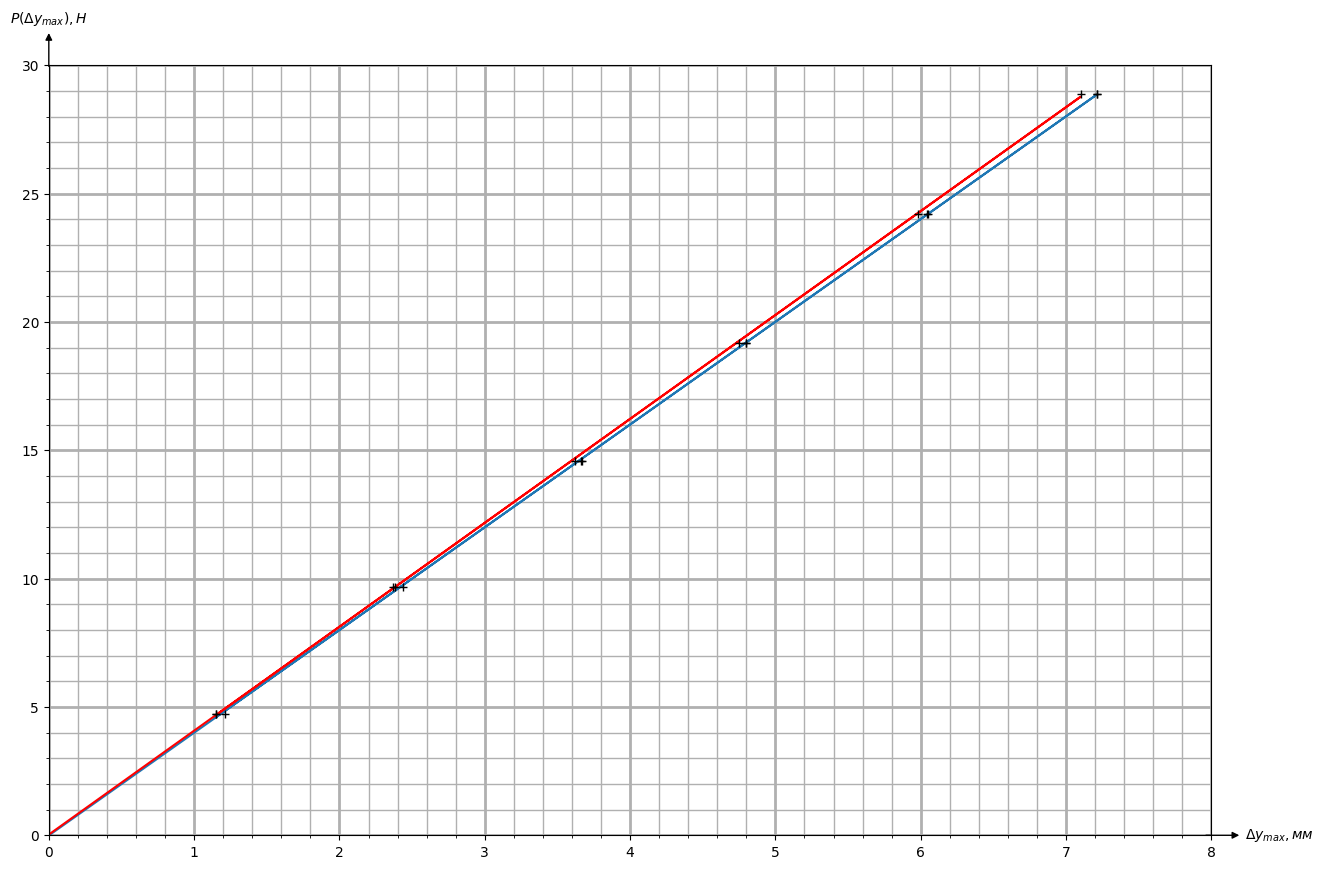

In [25]:
plt.figure(figsize=(15,10))

k1,b1=np.polyfit(dl1,P1,1)
k2,b2=np.polyfit(dl2,P2,1)
k3,b3=np.polyfit(dl3,P3,1)

P1_fit=b1+k1*np.append(dl1,0)
P2_fit=b2+k2*np.append(dl2,0)
P3_fit=b3+k3*np.append(dl3,0)


plt.plot(np.append(dl1,0),P1_fit)

plt.plot(np.append(dl2,0),P2_fit,c='r')
plt.errorbar(dl2,P2, yerr=0, xerr=0, color='k',fmt='+', label='Кресты') 
'''
x_err=np.array([0.03,0.01,0.01,0.03,0.05])
y_err=np.array([0.1,0.1,0.2,0.2,0.3])'''
plt.errorbar(dl1,P1, yerr=0, xerr=0, color='k',fmt='+', label='Кресты') 

plt.xlim(0,8)
plt.ylim(0, 30)

#— Decorate the spins
arrow_length = 30 # In points

# X-axis arrow
plt.annotate('$\Delta y_{max}, мм$', xy=(0.993, 0), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$P(\Delta y_{max}), H$', xy=(0,0.995), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)

plt.savefig(f'graphic12b.png')
plt.show()

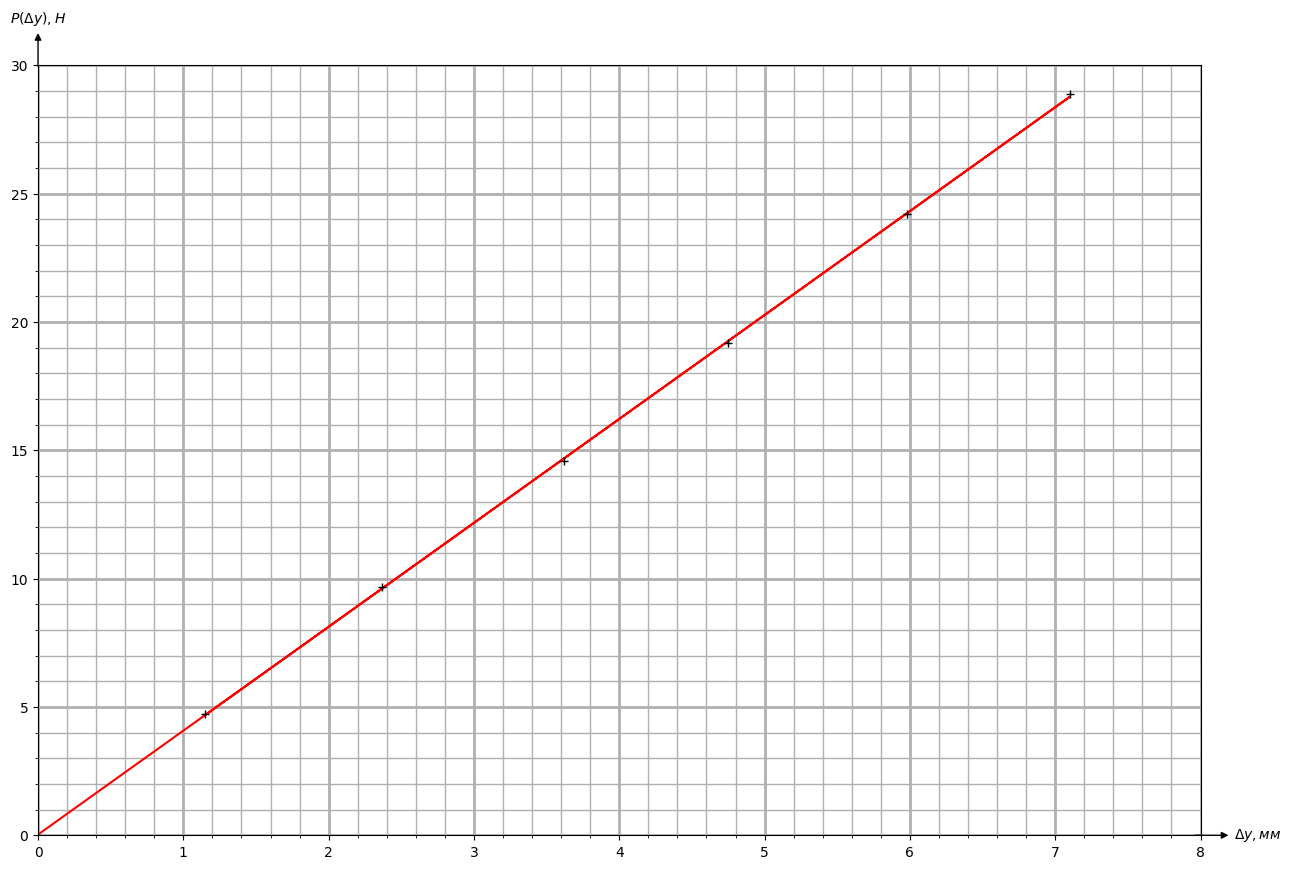

In [26]:
plt.figure(figsize=(15,10))

plt.plot(np.append(dl2,0),P2_fit,c='r')
plt.errorbar(dl2,P2, yerr=0, xerr=0, color='k',fmt='+', label='Кресты') 

plt.xlim(0,8)
plt.ylim(0, 30)

#— Decorate the spins
arrow_length = 30 # In points

# X-axis arrow
plt.annotate('$\Delta y, мм$', xy=(0.993,0), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$P(\Delta y), H$', xy=(0,0.995), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)

#plt.savefig(f'graphic3b.png')
plt.show()

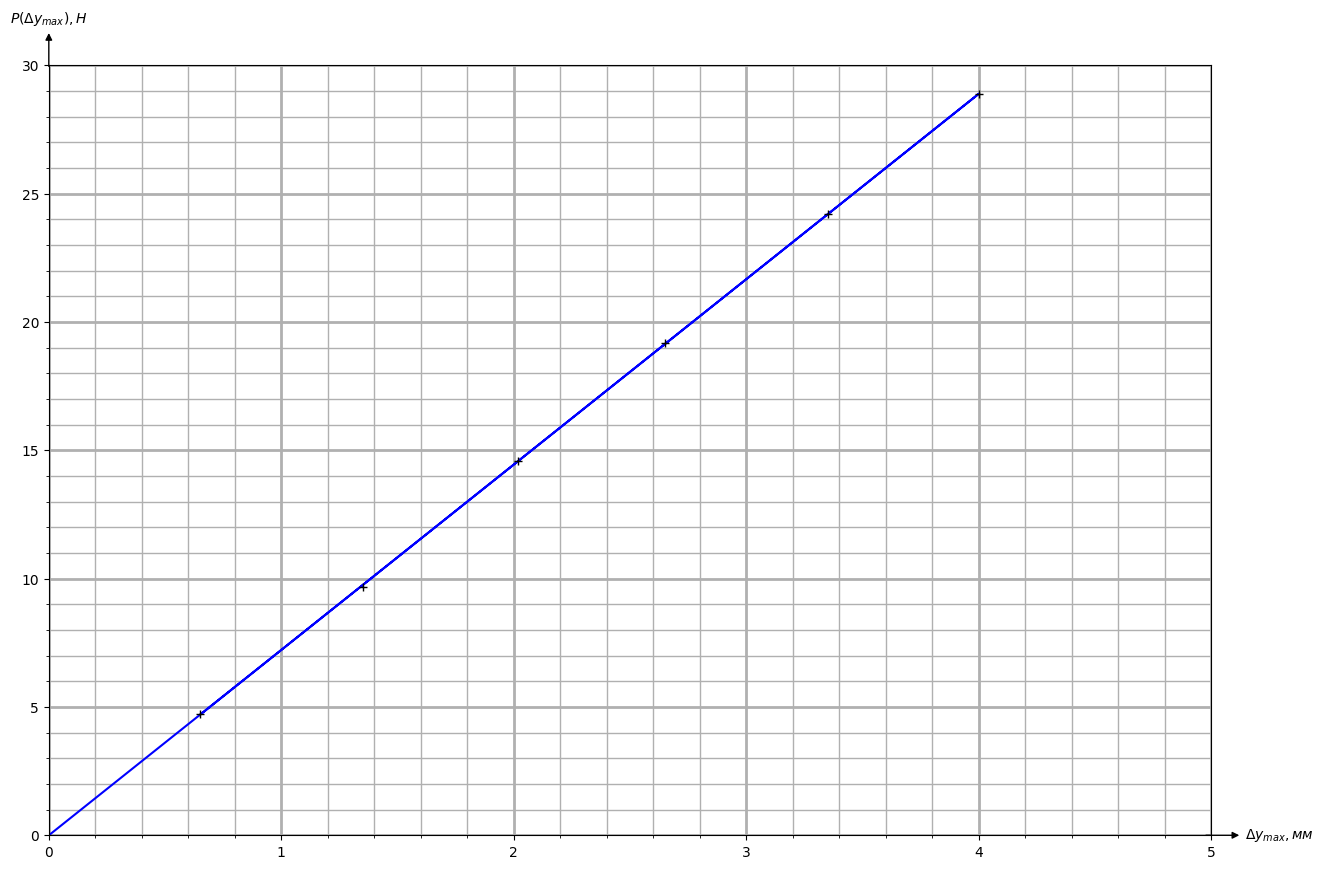

In [27]:
plt.figure(figsize=(15,10))

plt.plot(np.append(dl3,0),P3_fit,c='b')
plt.errorbar(dl3,P3, yerr=0, xerr=0, color='k',fmt='+', label='Кресты') 

plt.xlim(0,5)
plt.ylim(0, 30)

#— Decorate the spins
arrow_length = 30 # In points

# X-axis arrow
plt.annotate('$\Delta y_{max}, мм$', xy=(0.993, 0), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$P(\Delta y_{max}), H$', xy=(0,0.995), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)
plt.savefig(f'graphic3b.png')
plt.show()

In [28]:
def MNK(x,y):
plt.figure(figsize=(15,10))

k,b=np.polyfit(x,y,1)
y_fit=b1+k1*np.append(x,0)

plt.plot(x,y_fit,c='b')
plt.errorbar(x,y, yerr=0, xerr=0, color='k',fmt='+', label='Кресты') 

plt.xlim(0,5)
plt.ylim(0, 30)

#— Decorate the spins
arrow_length = 30 # In points

# X-axis arrow
plt.annotate('$\Delta y_{max}, мм$', xy=(0.993, 0), xycoords=('axes fraction', 'data'),
xytext=(arrow_length, 0), textcoords='offset points',
ha='left', va='center',
arrowprops=dict(arrowstyle='<|-', fc='black'))

# Y-axis arrow
plt.annotate('$P(\Delta y_{max}), H$', xy=(0,0.995), xycoords=('data', 'axes fraction'),
xytext=(0, arrow_length), textcoords='offset points',
ha='center', va='bottom',
arrowprops=dict(arrowstyle='<|-', fc='black'))

plt.minorticks_on()
plt.grid(which='major', lw=2)
plt.grid(which='minor', lw=1)

plt.show()

IndentationError: expected an indented block after function definition on line 1 (3191545375.py, line 2)

In [ ]:
print(k1,k2,k3)
print(k1*51**3/48/10.5,k2*51**3/48/10.5,k3*51**3/48/8.9)

4.002328644416647 4.048348778788852 7.222815074047204
1053.3986051795885 1065.5109401887303 2242.7753801204017


In [ ]:
print(rate_error(dl1,P1,k1)/k1,rate_error(dl2,P2,k2)/k2,rate_error(dl3,P3,k3)/k3)
print(rate_error(dl1,P1,k1),rate_error(dl2,P2,k2),rate_error(dl3,P3,k3))

0.003044838880176683 0.004625268197293753 0.0023422325398473704
0.012186445867764644 0.018724698858085077 0.016917512495733453
